# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [1]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


We would need do dummify species, island, and sex.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
# Linear Regression

y = penguins['bill_depth_mm'] # response variables
X = penguins[['bill_length_mm']] # explanatory variables 

lr_fit = lr.fit(X, y) # fit linear model
lr_fit.coef_ # find coefficients
y_pred_lr = lr_fit.predict(X)

In [18]:
# Quadratic
penguins["bill_length_mm_squared"] = penguins['bill_length_mm'] ** 2

y = penguins['bill_depth_mm'] # response variables
X = penguins[['bill_length_mm', 'bill_length_mm_squared']] # explanatory variables 

quad_fit = lr.fit(X, y) # fit linear model
quad_fit.coef_ # find coefficients
y_pred_quad = quad_fit.predict(X)

In [19]:
# Cubic
penguins["bill_length_mm_cubic"] = penguins['bill_length_mm'] ** 3

y = penguins['bill_depth_mm'] # response variables
X = penguins[['bill_length_mm', 'bill_length_mm_squared', 'bill_length_mm_cubic']] # explanatory variables 

cubic_fit = lr.fit(X, y) # fit linear model
cubic_fit.coef_ # find coefficients
y_pred_cubic = cubic_fit.predict(X)

In [20]:
# Degree 10 
penguins["bill_length_mm_four"] = penguins['bill_length_mm'] ** 4
penguins["bill_length_mm_five"] = penguins['bill_length_mm'] ** 5
penguins["bill_length_mm_six"] = penguins['bill_length_mm'] ** 6
penguins["bill_length_mm_seven"] = penguins['bill_length_mm'] ** 7
penguins["bill_length_mm_eight"] = penguins['bill_length_mm'] ** 8
penguins["bill_length_mm_nine"] = penguins['bill_length_mm'] ** 9
penguins["bill_length_mm_ten"] = penguins['bill_length_mm'] ** 10

y = penguins['bill_depth_mm'] # response variables
X = penguins[['bill_length_mm', 'bill_length_mm_squared', 'bill_length_mm_cubic', 'bill_length_mm_four',
             'bill_length_mm_five', 'bill_length_mm_six', 'bill_length_mm_seven', 'bill_length_mm_eight',
             'bill_length_mm_nine', 'bill_length_mm_ten']] # explanatory variables 

ten_fit = lr.fit(X, y) # fit linear model
ten_fit.coef_ # find coefficients
y_pred_ten = ten_fit.predict(X)

In [28]:
# Make Scatterplot
linear = penguins[['bill_length_mm']]
linear['prediction'] = y_pred_lr
linear['model'] = "linear"

quad = penguins[['bill_length_mm']]
quad['prediction'] = y_pred_quad
quad['model'] = "quadratic"

cubic = penguins[['bill_length_mm']]
cubic['prediction'] = y_pred_cubic
cubic['model'] = "cubic"

deg10 = penguins[['bill_length_mm']]
deg10['prediction'] = y_pred_ten
deg10['model'] = "degree10"

original = penguins[['bill_length_mm']]
original['prediction'] = penguins['bill_depth_mm']
original['model'] = 'actual'

#pd.concat([df1, df2], axis=0)
visual = pd.concat([original, linear, quad, cubic, deg10], axis = 0)
visual

/var/folders/kp/7w6m09t14vq8tqs2dnpd1t6h0000gn/T/ipykernel_16288/65956077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear['prediction'] = y_pred_lr
/var/folders/kp/7w6m09t14vq8tqs2dnpd1t6h0000gn/T/ipykernel_16288/65956077.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear['model'] = "linear"
/var/folders/kp/7w6m09t14vq8tqs2dnpd1t6h0000gn/T/ipykernel_16288/65956077.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,bill_length_mm,prediction,model
0,39.1,18.700000,actual
1,39.5,17.400000,actual
2,40.3,18.000000,actual
4,36.7,19.300000,actual
5,39.3,20.600000,actual
...,...,...,...
339,55.8,18.002301,degree10
340,43.5,16.602072,degree10
341,49.6,16.583429,degree10
342,50.8,17.426467,degree10


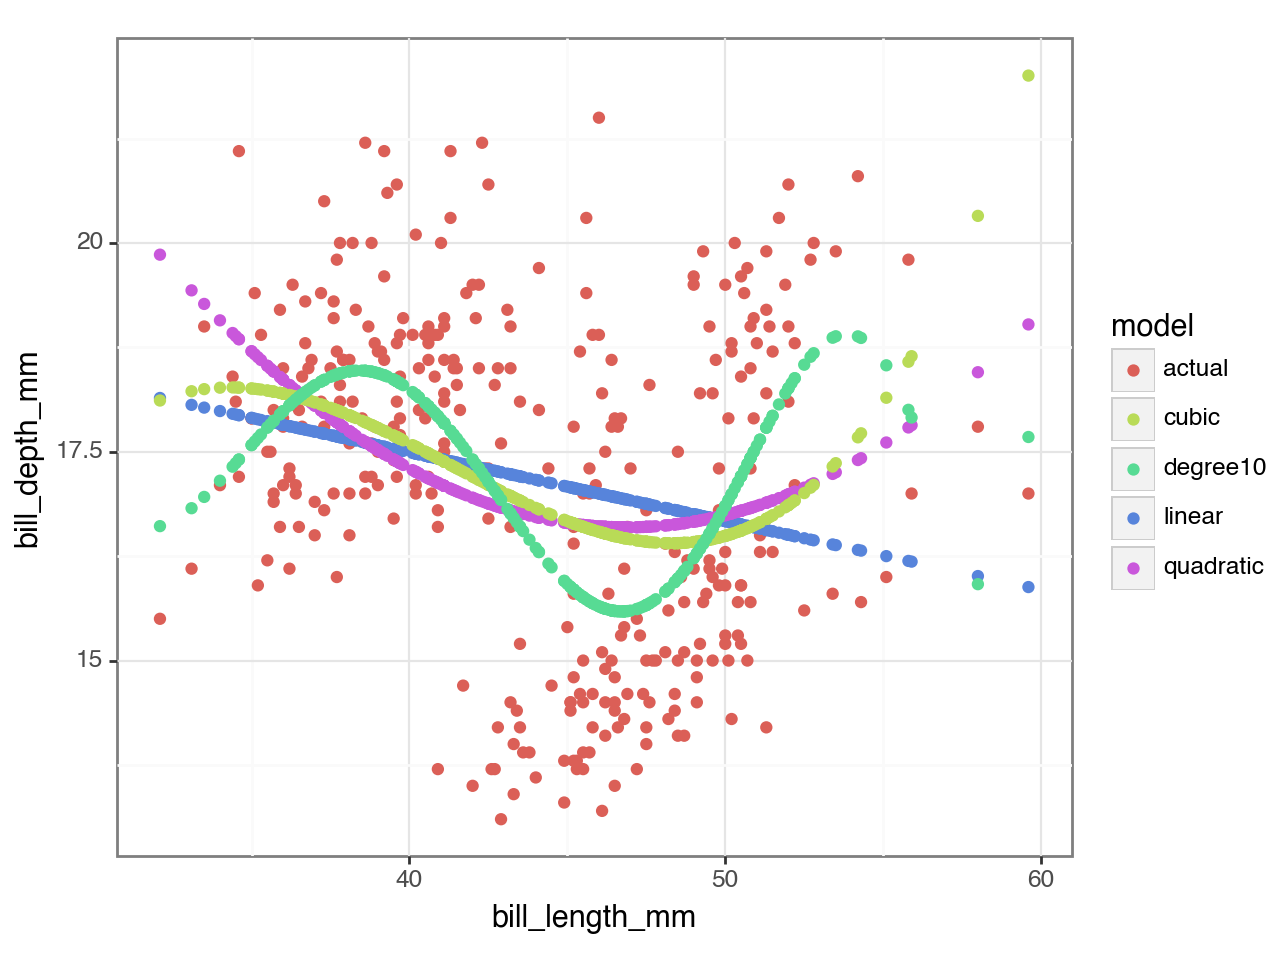

<Figure Size: (640 x 480)>

In [31]:
from plotnine import ggplot, aes, geom_point, labs, theme_bw

# Create a scatterplot and map color to the 'Category' variable
(ggplot(visual, aes(x='bill_length_mm', y='prediction', color='model'))
     + geom_point()
     + labs(x = "bill_length_mm", y = 'bill_depth_mm')
     + theme_bw()
)



* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

- I would say that the linear model is severely underfitting the data as it does not resemble the actual data at all, missing the overall shape of the points. 
- I would say that the degree 10 model is overfitting the data as it is overly sensitive to the data, trying to fit the data perfectly. 
- If I had to select a model, I would say that the cubic model fits the data best as it represents the data well without all the nooks and crannies. 